Pre-treatment data size before filtering: (1655, 18)
Pre-treatment data size after filtering: (1074, 18)
Post-treatment data size before filtering: (1637, 18)
Post-treatment data size after filtering: (1127, 18)
Weighted Pre-Treatment Speed: 18.77 mph
Weighted Post-Treatment Speed: 15.30 mph
T-Statistic: 40.054, P-Value: 0.000


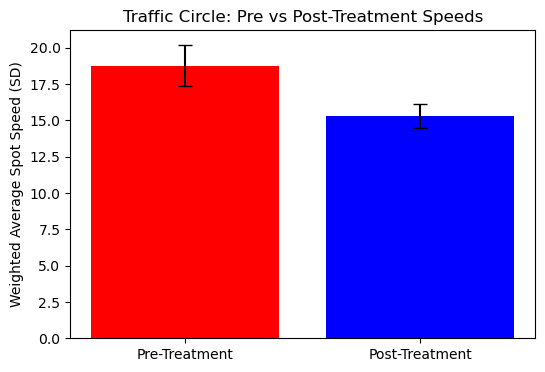

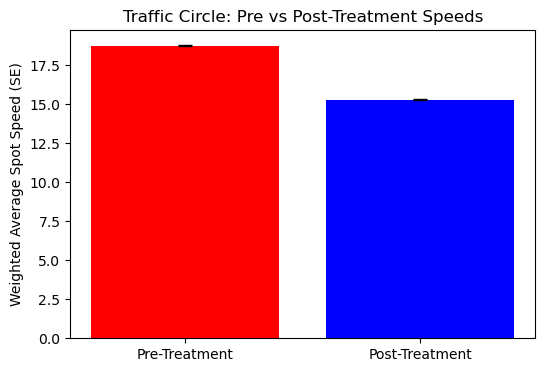

Highest value for pre-treatment'85th Speed Percentile': 34.0 mph Highest value for post-treatment'85th Speed Percentile': 32.0 mph
Row details:
Data Periods                                          Jun 01, 2021 - Jun 01, 2022
Mode of Travel                             All Vehicles - StL All Vehicles Volume
Zone ID                                                                       NaN
Zone Name                                                         Ellenwood Drive
Zone Is Pass-Through                                                          yes
Zone Direction (degrees)                                                      194
Zone is Bi-Direction                                                          yes
Year-Month                                                                2022-03
Day Type                                                          1: Monday (M-M)
Day Part                                                   1: Early AM (12am-6am)
Average Daily Spot Traffic (StL Volu

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
22,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Addison Way,yes,102,yes,2021-06,3: Wednesday (W-W),4: Peak PM (3pm-7pm),68,18.0,26.980,0.656,1.0,6.0,28.0,82.0
17,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Addison Way,yes,102,yes,2021-06,2: Tuesday (Tu-Tu),5: Late PM (7pm-12am),43,15.0,26.980,0.570,6.0,9.0,19.0,68.0
2178,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive (1),yes,194,yes,2022-03,7: Sunday (Su-Su),1: Early AM (12am-6am),28,20.0,26.203,0.756,6.0,15.0,25.0,61.0
1548,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive,yes,194,yes,2022-02,6: Saturday (Sa-Sa),1: Early AM (12am-6am),28,23.0,28.383,0.806,11.0,12.0,27.0,48.0
527,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Addison Way,yes,102,yes,2022-04,7: Sunday (Su-Su),5: Late PM (7pm-12am),36,16.0,25.329,0.639,1.0,1.0,28.0,44.0
1302,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive,yes,194,yes,2021-09,5: Friday (F-F),1: Early AM (12am-6am),36,19.0,30.105,0.633,15.0,16.0,22.0,44.0
1956,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive (1),yes,194,yes,2021-11,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),40,19.0,26.390,0.730,11.0,13.0,25.0,44.0
1260,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive,yes,194,yes,2021-08,6: Saturday (Sa-Sa),1: Early AM (12am-6am),26,22.0,24.810,0.903,14.0,16.0,43.0,43.0
1380,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive,yes,194,yes,2021-11,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),35,23.0,25.634,0.910,4.0,15.0,35.0,43.0
1572,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive,yes,194,yes,2022-03,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),33,25.0,29.204,0.839,11.0,17.0,30.0,42.0


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/Ellenwood_pre.csv')
post_treatment = pd.read_csv('data/Ellenwood_post.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

def filter_outliers(df, column, threshold=3):
    valid_values = df[column].dropna()
    z_scores = stats.zscore(valid_values)
    valid_indices = valid_values.index[np.abs(z_scores) < threshold]
    return df.loc[valid_indices]

pre_treatment_filtered = filter_outliers(pre_treatment, '95th Speed Percentile')
post_treatment_filtered = filter_outliers(post_treatment, '95th Speed Percentile')

print("Pre-treatment data size before filtering:", pre_treatment.shape)
print("Pre-treatment data size after filtering:", pre_treatment_filtered.shape)
print("Post-treatment data size before filtering:", post_treatment.shape)
print("Post-treatment data size after filtering:", post_treatment_filtered.shape)

pre_speeds = pre_treatment_filtered['Avg Spot Speed (mph)']
post_speeds = post_treatment_filtered['Avg Spot Speed (mph)']
pre_volume = pre_treatment_filtered['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment_filtered['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

max_85th_speed_row_pre = pre_treatment_filtered.loc[pre_treatment_filtered['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment_filtered.loc[post_treatment_filtered['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print("Row details:")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed_pre = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed_pre

In [2]:
top_speed_post = post_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed_post

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
377,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,Addison Way,yes,102,yes,2024-01,6: Saturday (Sa-Sa),5: Late PM (7pm-12am),26,11.0,21.015,0.546,1.0,1.0,16.0,56.0
1949,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive (1),yes,194,yes,2023-11,4: Thursday (Th-Th),1: Early AM (12am-6am),16,20.0,20.030,1.000,13.0,13.0,24.0,49.0
1427,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive,yes,194,yes,2023-12,5: Friday (F-F),1: Early AM (12am-6am),31,20.0,25.597,0.772,12.0,15.0,21.0,49.0
251,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,Addison Way,yes,102,yes,2023-11,1: Monday (M-M),5: Late PM (7pm-12am),32,11.0,30.404,0.373,1.0,10.0,15.0,48.0
308,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,Addison Way,yes,102,yes,2023-12,3: Wednesday (W-W),2: Peak AM (6am-10am),35,17.0,30.001,0.554,9.0,10.0,28.0,48.0
1409,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive,yes,194,yes,2023-12,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),28,20.0,25.597,0.764,9.0,14.0,23.0,47.0
1985,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive (1),yes,194,yes,2023-12,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),36,20.0,23.468,0.840,9.0,15.0,22.0,47.0
1457,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive,yes,194,yes,2024-01,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),21,19.0,22.069,0.883,17.0,17.0,46.0,46.0
2033,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,Ellenwood Drive (1),yes,194,yes,2024-01,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),22,19.0,20.639,0.909,14.0,14.0,26.0,46.0
152,"Jun 01, 2023 - Jun 01, 2024",All Vehicles - StL All Vehicles Volume,NaN,Addison Way,yes,102,yes,2023-09,1: Monday (M-M),2: Peak AM (6am-10am),30,18.0,19.248,0.929,2.0,10.0,32.0,42.0


In [3]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")

Weighted Pre-Treatment 85th Speed Percentile: 23.60 mph
Weighted Post-Treatment 85th Speed Percentile: 18.71 mph
Weighted Pre-Treatment 95th Speed Percentile: 27.83 mph
Weighted Post-Treatment 95th Speed Percentile: 21.37 mph
Highest value for pre-treatment'85th Speed Percentile': 43.0 mph Highest value for post-treatment'85th Speed Percentile': 46.0 mph


In [4]:
filtered_pre = pre_treatment[pre_treatment['Day Type'] != '0: All Days (M-Su)']
filtered_post = post_treatment[post_treatment['Day Type'] != '0: All Days (M-Su)']

total_pre_volume = filtered_pre['Average Daily Spot Traffic (StL Volume)'].sum()
total_post_volume = filtered_post['Average Daily Spot Traffic (StL Volume)'].sum()

total_combined_volume = total_pre_volume + total_post_volume

print(f"Total Pre-Treatment Volume: {total_pre_volume:,.0f}")
print(f"Total Post-Treatment Volume: {total_post_volume:,.0f}")
print(f"Combined Volume (Pre + Post): {total_combined_volume:,.0f}")


Total Pre-Treatment Volume: 240,770
Total Post-Treatment Volume: 235,942
Combined Volume (Pre + Post): 476,712


In [6]:
results = {
    'Intersection': 'Ellenwood Dr & Addison Way',
    'Pre_Mean': float(pre_weighted_speed),
    'Post_Mean': float(post_weighted_speed),
    'Pre_Std': float(pre_weighted_std),
    'Post_Std': float(post_weighted_std),
    'Pre_SE': float(pre_weighted_se),
    'Post_SE': float(post_weighted_se),
    'Pre_85th': float(pre_weighted_85th_speed),
    'Post_85th': float(post_weighted_85th_speed),
    'Pre_95th': float(pre_weighted_95th_speed),
    'Post_95th': float(post_weighted_95th_speed),
    'Pre_Max_85th': float(max_85th_speed_value_pre),
    'Post_Max_85th': float(max_85th_speed_value_post),
    'T_Statistic': float(t_stat),
    'P_Value': float(p_value),
    'Pre_Volume': int(total_pre_volume),
    'Post_Volume': int(total_post_volume),
    'Combined Volume': int(total_combined_volume),
    'Pre_Treatment_Volume': int(total_pre_volume),
    'Post_Treatment_Volume': int(total_post_volume),
    'Combined_Volumne': int(total_combined_volume)
}
import json
with open('../results/Ellenwood Dr & Addison Way_summary.json', 'w') as f:
    json.dump(results, f)